# Transfer learning - Fine tuning

In [21]:
from __future__ import absolute_import, division, print_function
import os
import tensorflow as tf
from tensorflow import keras
print("TensorFlow version is ", tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.optimizers import SGD

TensorFlow version is  2.16.1


In [12]:
zip_file = tf.keras.utils.get_file(origin="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip",
                                   fname="cats_and_dogs_filtered.zip", extract=True)
base_dir, _ = os.path.splitext(zip_file)
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [13]:
image_size = 160 
batch_size = 32

In [14]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                train_dir, 
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
                validation_dir, 
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='binary')
IMG_SHAPE = (image_size, image_size, 3)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


- [Hay] - Cách code khác của transfer learning

In [15]:
base_model = tf.keras.applications.MobileNet(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
model = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(1, activation='sigmoid')
])

Compile là cấu hình model . Fit và Fit_generator là training model

- Phương thức fit() được sử dụng khi dữ liệu huấn luyện được load trực tiếp vào bộ nhớ và có sẵn dưới dạng mảng NumPy hoặc tensors.
- Phương thức fit_generator() được sử dụng khi dữ liệu huấn luyện cần được tạo ra thông qua một trình tạo (generator).
    + Thay vì truyền trực tiếp dữ liệu vào, bạn truyền một trình tạo generator và steps_per_epoch, và mô hình sẽ lặp lại việc gọi trình tạo để lấy dữ liệu huấn luyện.
    + Điều này thường được sử dụng khi bạn có một lượng lớn dữ liệu và không thể fit vào bộ nhớ một cách hiệu quả.

In [17]:
# params 
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

#### freeze VGG model


In [20]:
# Freeze VGG model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

for layer in base_model.layers:
    layer.trainable = False

history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps)


Epoch 1/10


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 317ms/step - accuracy: 0.4512 - loss: 0.8485 - val_accuracy: 0.6825 - val_loss: 0.6020
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5938 - loss: 0.3949 - val_accuracy: 0.6250 - val_loss: 0.3079
Epoch 3/10


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.6976 - loss: 0.5771 - val_accuracy: 0.8306 - val_loss: 0.4220
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.9062 - loss: 0.2138 - val_accuracy: 0.8750 - val_loss: 0.1942
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.8402 - loss: 0.3920 - val_accuracy: 0.9002 - val_loss: 0.3051
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.8438 - loss: 0.1678 - val_accuracy: 0.6250 - val_loss: 0.2412
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.9004 - loss: 0.2955 - val_accuracy: 0.9304 - val_loss: 0.2372
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.9375 - loss: 0.1057 - val_accuracy: 1.0000 - val_loss: 0.0588
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.9381 - loss: 0.2239 - val_accuracy: 0.9425 - val_loss: 0.1949
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: 0.1222 - val_accuracy: 1.0000 - v

#### unfreeze some last CNN layer:

In [23]:
# unfreeze some last CNN layer:
for layer in base_model.layers[15:]:
    layer.trainable = True

optimizer = SGD(0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 32s 452ms/step - accuracy: 0.8909 - loss: 0.2854 - val_accuracy: 0.9425 - val_loss: 0.1753
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.1554 - val_accuracy: 1.0000 - val_loss: 0.0302
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 27s 425ms/step - accuracy: 0.9329 - loss: 0.2041 - val_accuracy: 0.9506 - val_loss: 0.1543
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.8750 - loss: 0.1000 - val_accuracy: 0.8750 - val_loss: 0.0731
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 27s 432ms/step - accuracy: 0.9453 - loss: 0.1724 - val_accuracy: 0.9546 - val_loss: 0.1385
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.8438 - loss: 0.1427 - val_accuracy: 0.8750 - val_loss: 0.0720
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 466ms/step - accuracy: 0.9551 - loss: 0.1436 - val_accuracy: 0.9607 - val_loss: 0.1271
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 1.0000 - loss: 0.0463 - val_accuracy: 

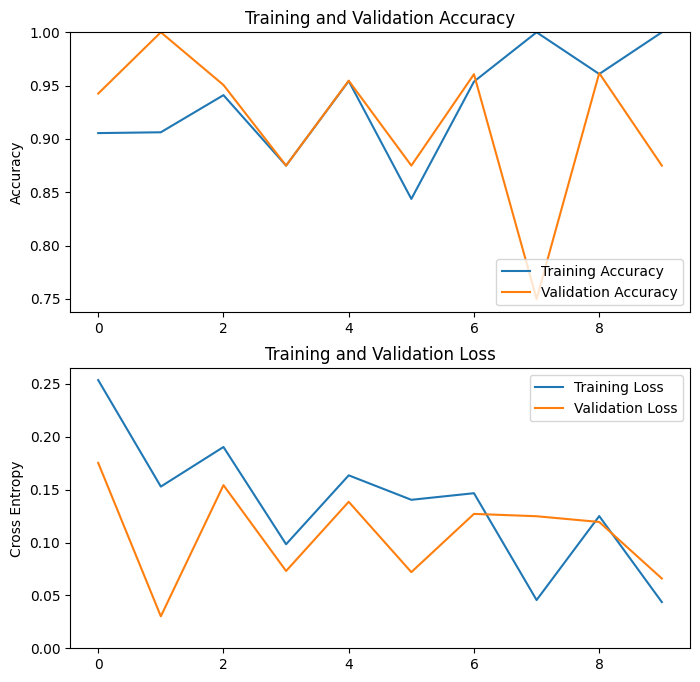

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()